In [ ]:
#Linear Models for Classification

In [3]:
import urllib.request 
import pandas as pd

train_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/mobile_price_test.csv'


def download_read_data(path):
    

    """
    Function to retrieve data from the data paths
    And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    # Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(str(data_path))

    return data

In [4]:
# Getting train data 

mobile_train = download_read_data(train_data_path)

In [6]:
mobile_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# Getting test data 

mobile_test = download_read_data(test_data_path)
# mobile_test.head(2)

In [8]:
# Looking at tail (last rows) of the data 

mobile_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [9]:
# Checking the number of data points/size of the data
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(mobile_train), len(mobile_test)))

The size of training data is: 2000 
The size of testing data is: 1000


In [10]:
# Checking the number of features
len(mobile_train.columns)

21

In [11]:
train_data = mobile_train.copy()

In [12]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<AxesSubplot:>

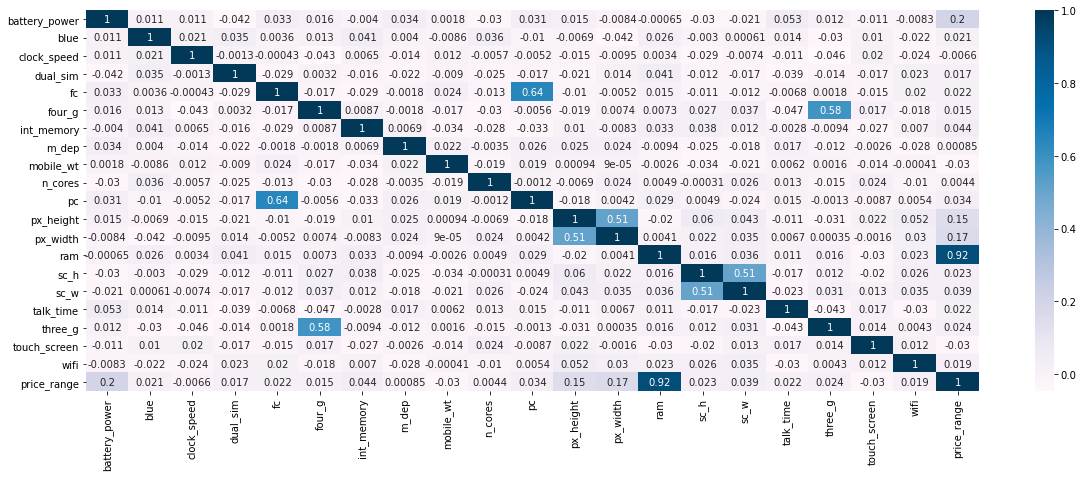

In [14]:
# Visualizing correlation

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,7))
sns.heatmap(correlation, annot=True, cmap='PuBu')

In [15]:
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mobile Price Ranges')

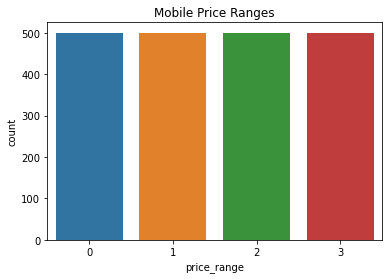

In [16]:
sns.countplot(mobile_train['price_range'])
plt.title('Mobile Price Ranges')

In [19]:
training_input_data = mobile_train.drop('price_range', axis=1)
training_labels = mobile_train['price_range']

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def scale_feats(num_input_data):

  """
  Take input numerical data and return the normalized data

  """

  normalized_data = scaler.fit_transform(num_input_data)

  return normalized_data

In [21]:
training_final = scale_feats(training_input_data)

In [ ]:
#Creating and Training a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(training_final, training_labels)

LogisticRegression()

In [23]:
log_model.score(training_final, training_labels)

0.947

In [24]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [25]:
sgd_clf.score(training_final, training_labels)

0.742

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [27]:
tree_clf.score(training_final, training_labels)

1.0

In [28]:
# Let's hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, training_final, training_labels,
                         cv=10)


In [30]:
log_scores

array([0.915, 0.94 , 0.91 , 0.93 , 0.935, 0.94 , 0.92 , 0.925, 0.91 ,
       0.92 ])

In [31]:
log_scores.mean()

0.9245000000000001

In [32]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, training_final, training_labels,
                         cv=10)

In [33]:
sgd_scores

array([0.76 , 0.79 , 0.74 , 0.75 , 0.745, 0.795, 0.805, 0.74 , 0.77 ,
       0.73 ])

In [34]:
sgd_scores.mean()

0.7625

In [35]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, training_final, training_labels,
                         cv=10)

In [36]:
tree_scores

array([0.805, 0.86 , 0.86 , 0.82 , 0.87 , 0.835, 0.82 , 0.775, 0.865,
       0.795])

In [37]:
tree_scores.mean()

0.8305

In [42]:
from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train = cross_val_predict(log_model, training_final, training_labels,
                         cv=10)

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(training_labels, predictions_on_train)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]])

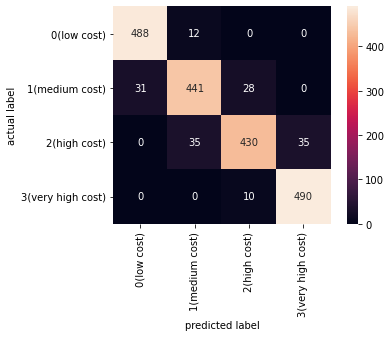

In [44]:
cm = confusion_matrix(training_labels, predictions_on_train)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'],
                        yticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train)

0.9245

In [46]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

